<a href="https://colab.research.google.com/github/1900690/image-editing/blob/main/%E3%83%9E%E3%82%B9%E3%82%AF%E3%81%AB%E5%90%88%E3%82%8F%E3%81%9B%E3%81%A6%E5%88%87%E3%82%8A%E5%8F%96%E3%82%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#マスクに従って画像を合成

[参考](https://note.nkmk.me/python-pillow-composite/#:~:text=4.4.0.dev0%20documentation-,%E5%9B%B3%E5%BD%A2%E6%8F%8F%E7%94%BB%E3%81%A7%E3%83%9E%E3%82%B9%E3%82%AF%E7%94%BB%E5%83%8F%E3%82%92%E4%BD%9C%E6%88%90,-%E5%86%86%E3%82%84%E5%9B%9B%E8%A7%92)

In [ ]:
#@title fastlabelでオリジナル画像をアップロード
import shutil
import os
from google.colab import files
import math


#すでにフォルダがある場合は消す
if os.path.exists("/content/original"):
  shutil.rmtree("/content/original")

#データをアップロード
file_name ="syakuyaku-reaf-only_20250211233456.zip"
#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
#zipを消す
os.remove('/content/'+file_name)

In [ ]:
#@title fastlabelでマスク画像をアップロード
if os.path.exists("/content/mask_binary"):
  shutil.rmtree("/content/mask_binary")

#データをアップロード
file_name ="syakuyaku-reaf-only_20250211233504.zip"
#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
#zipを消す
os.remove('/content/'+file_name)

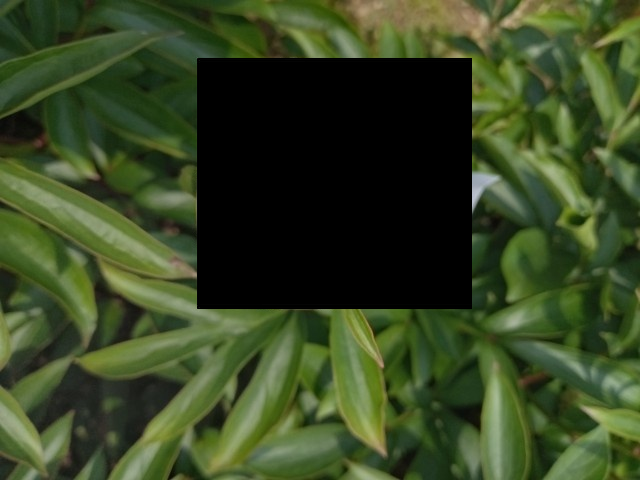

In [ ]:
#@title マスクで指定された部分を切り取り
from PIL import Image, ImageDraw, ImageFilter
import glob
from PIL import Image, ImageOps

file_list = sorted(glob.glob('/content/original/*.jpg'))

if os.path.exists('/content/output'):
    shutil.rmtree("/content/output")
if not os.path.exists('/content/output'):
    os.makedirs('/content/output')

for filename in file_list:
    im2 = Image.open(filename)
    im1 = ImageOps.invert(Image.open('/content/mask_binary/semantic_segmentations/'+os.path.basename(filename)))
    mask = Image.open('/content/mask_binary/semantic_segmentations/'+os.path.basename(filename))
    im = Image.composite(im1, im2, mask)

    im.save('/content/output/'+os.path.basename(filename))

im

In [ ]:
#@markdown 作ったファイルをダウンロード
import shutil
import os
from google.colab import files

shutil.make_archive('/content/convert', 'zip', '/content/output')

'/content/convert.zip'